In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [30]:
data = np.genfromtxt(fname='heading-pitch-longterm.csv', usecols=range(0, 2), delimiter=",", names=True)
#data = data[1:]
data_x = np.linspace(0, np.shape(data)[0], np.shape(data)[0])/2   # samples are every 500ms
mean_heading = np.mean(data["heading"]).round(4)
mean_pitch = np.mean(data["pitch"]).round(4)
print("Samples: {}".format(np.shape(data)[0]))

Samples: 17299


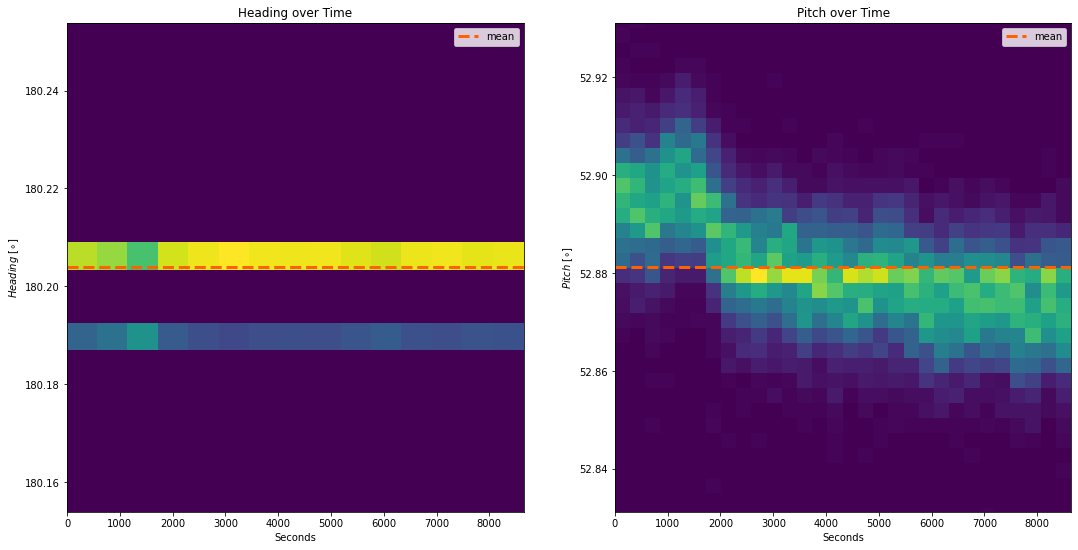

In [140]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9), tight_layout=False)
dy = 0.05

axs[0].set_title("Heading over Time");
axs[0].grid(True);
axs[0].hist2d(data_x, data["heading"], bins=[15,4]);
axs[0].hlines(mean_heading, data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100', label='mean');
axs[0].set(ylabel='$Heading\ [\circ$]', xlabel='Seconds');
axs[0].set_ylim(mean_heading-dy, mean_heading+dy)
axs[0].set_facecolor("#440154")
axs[0].legend();

axs[1].set_title("Pitch over Time");
axs[1].grid(True);
axs[1].hist2d(data_x, data["pitch"], bins=[30,60]);
axs[1].hlines(mean_pitch, data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100', label='mean');
axs[1].set(ylabel='$Pitch\ [\circ]$', xlabel='Seconds');
axs[1].set_ylim(mean_pitch-dy, mean_pitch+dy)
axs[1].set_facecolor("#440154")
axs[1].legend();

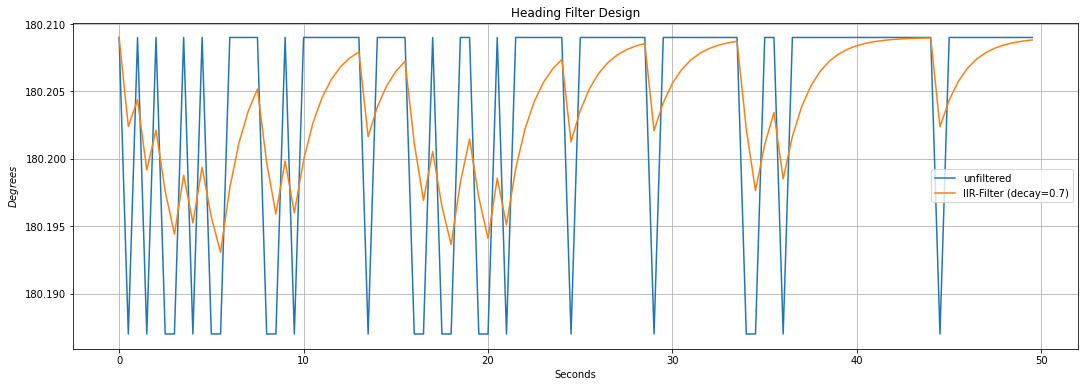

In [134]:
num_avg = 100

fig, axs = plt.subplots(1, 1, figsize=(18, 6), tight_layout=False)
axs.set_title("Heading Filter Design");
axs.grid(True);

filtered = np.array([])
val = data["heading"][0]
for x in data["heading"]:
    val += (1-0.7) * (x - val)
    filtered = np.append(filtered, val)

axs.plot(data_x[:100], data["heading"][:100], label="unfiltered");
axs.plot(data_x[:100], filtered[:100], label="IIR-Filter (decay=0.7)");
#axs.plot(data_x[num_avg-1:], np.convolve(data["heading"], np.ones(num_avg), 'valid') / num_avg, linewidth=3, linestyle='-', label="50 samples");
axs.set(ylabel='$Degrees$', xlabel='Seconds');
axs.legend();

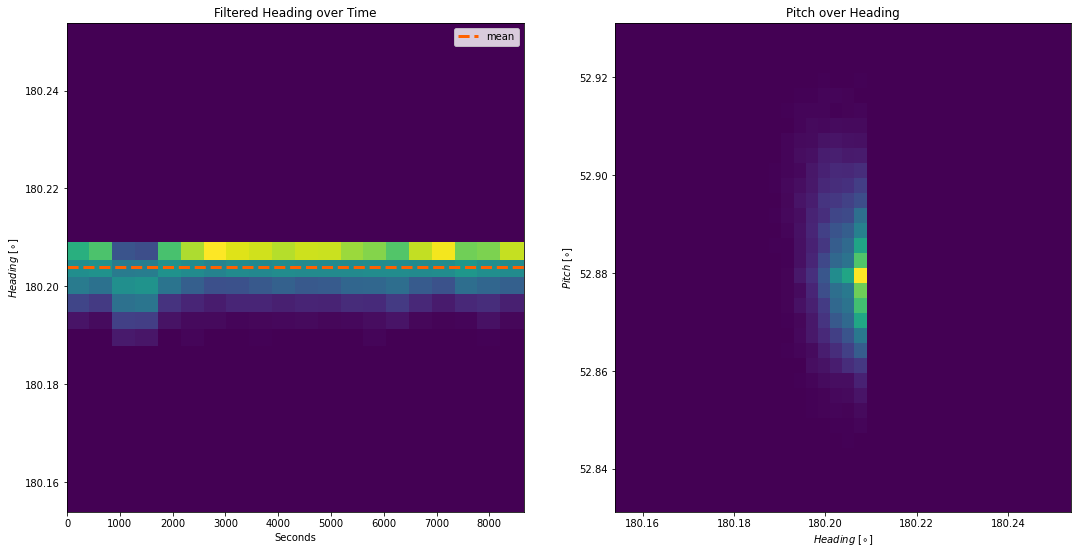

In [141]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9), tight_layout=False)
dy = 0.05

axs[0].set_title("Filtered Heading over Time");
axs[0].grid(True);
axs[0].hist2d(data_x, filtered, bins=[20,6]);
axs[0].hlines(mean_heading, data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100', label='mean');
axs[0].set(ylabel='$Heading\ [\circ$]', xlabel='Seconds');
axs[0].set_ylim(mean_heading-dy, mean_heading+dy)
axs[0].set_facecolor("#440154")
axs[0].legend();

axs[1].set_title("Pitch over Heading");
axs[1].grid(True);
axs[1].hist2d(filtered, data["pitch"], bins=[8, 60]);
axs[1].set(ylabel='$Pitch\ [\circ$]', xlabel='$Heading\ [\circ$]');
axs[1].set_xlim(mean_heading-dy, mean_heading+dy)
axs[1].set_ylim(mean_pitch-dy, mean_pitch+dy)
axs[1].set_facecolor("#440154")